# Gerekli kütüphanelerimizi import ediyoruz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("world_gdp_data.csv", encoding='latin-1')


# İlk datasetimizi yüklüyoruz 

In [2]:
df = pd.read_csv("world_gdp_data.csv", encoding='latin-1')
silinecek_sutunlar = ["country_name","indicator_name"]

# Boş kısımları doldurabilmek için "string" ifadeli sütunları siliyoruz 

In [3]:
df2 = df.drop(silinecek_sutunlar, axis=1)

# Ortamalar adlı bir tutucu tanımlıyoruz ve boş verilerimizi diğer verilerimizin ortalaması ile dolduruyoruz

In [4]:

ortalamalar = df2.mean() 
df2 = df.fillna(ortalamalar)

# İkinci datasetimizi yüklüyoruz

In [5]:
df1 = pd.read_csv("world_population.csv", encoding='latin-1')

# Birinci ve ikinci kütüphanelerimizi yatay olarak birleştiriyoruz


In [6]:
df_concat = pd.concat([df2, df1],axis=1)

# İlerleyen süreçte veri çekmeye çalışırken "syntax" hatası aldığımız için şimdiden kullanacağımız bazı satırların isimlerini değiştiriyoruz ve bu değişikliklerin kalıcı olması için "inplace=True" ifadesini kullanıyoruz


In [7]:
df_concat.rename(columns={"Country/Territory":"country_name"},inplace=True)
df1.rename(columns={"Country/Territory":"country_name"},inplace=True)
df_concat.rename(columns={"2000 Population":"ikibin_population"},inplace=True)
df_concat.rename(columns={"2010 Population":"ikibinon_population"},inplace=True)
df_concat.rename(columns={"Growth Rate":"Growth_Rate"},inplace=True)

# Ülke isimleri sütunlarını eşitledikten sonra ortak sütunları birleştirdik ve bunu "country_names" isimli dosyaya atadık


In [8]:
country_names = pd.concat([df, df1], join='inner')


# df adlı dataframemizde country_name sütununda tekrar eden verileri attık


In [9]:
df = df.drop_duplicates(subset=["country_name"])


# Merge fonksiyonu ile eşleşen sadece eşleşen ülkeleri yazmayı sağladık


In [10]:
df_real = pd.merge(df, df1, on='country_name')


# Silmemiz gereken "string" içeren sütunları tanımladık ve sonrasında o sütunları sildik sonrasında yeni oluşan data framemizi "df_real2" adlı df'ye atadık


In [11]:
silinecek_sutunlar = ["country_name","indicator_name","CCA3","Capital","Continent"]
df_real2 = df_real.drop(silinecek_sutunlar, axis=1)


# df_real2 dosyamızda ki boş yerlerimizi verilerimizin ortalaması ile doldurduk


In [12]:

ortalamalar = df_real2.mean()
df_real2 = df_real2.fillna(ortalamalar)

# df_real adlı df'mizden istemediğimiz sütunları attık ve sonrasında onları aynı isimde tutucalarla tuttuk


In [13]:
country_name = df_real.pop('country_name')
indicator_name = df_real.pop('indicator_name')
CCA3 = country_name = df_real.pop('CCA3')
Capital = df_real.pop('Capital')
Continent = df_real.pop('Continent')

# Tuttuğumuz sütunları df_real2 ile birleştirdik ve df'mizin son halini hazırladık


In [14]:
df_concat_son = pd.concat([df_real2, Continent, Capital, country_name, indicator_name, CCA3],axis=1)


# Sonrasında kullanmak istediğimiz bazı sütunların isimlerini değiştirdik 


In [29]:
df_concat_son.rename(columns={"2000 Population":"ikibin_population"},inplace=True)
df_concat_son.rename(columns={"2010 Population":"ikibinon_population"},inplace=True)
df_concat_son.rename(columns={"Growth Rate":"Growth_Rate"},inplace=True)
df_concat_son.rename(columns={"World Population Percentage":"World_Population_Percentage"},inplace=True)
df_concat_son.rename(columns={"Area (kmÂ²)":"Area"},inplace=True)
df_concat_son.rename(columns={"Density (per kmÂ²)":"Density"},inplace=True)

# Histogram düzeyinde kaç ülkenin o büyüme oranına sahip olduğunu belirten bir grafik oluşturduk 


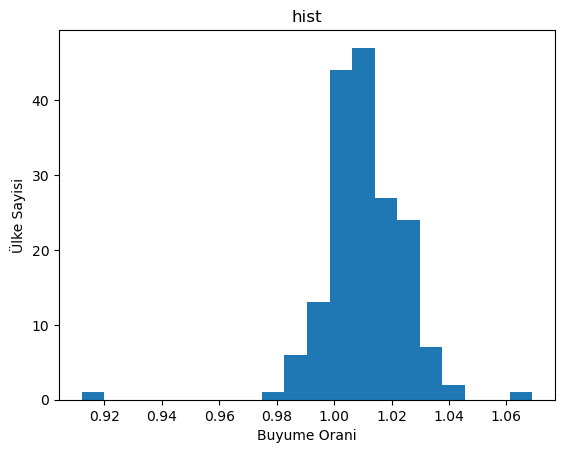

In [16]:
plt.hist(df_concat_son.Growth_Rate,bins= 20) #bins histodaki cubuklarin inceligini arttirir
plt.xlabel("Buyume Orani")
plt.ylabel("Ülke Sayisi")
plt.title("hist")
plt.show()


# Bar düzeyinde ikibinon yılında kıtaların nüfus sayılarını karşılaştırdığımız grafiği oluşturduk


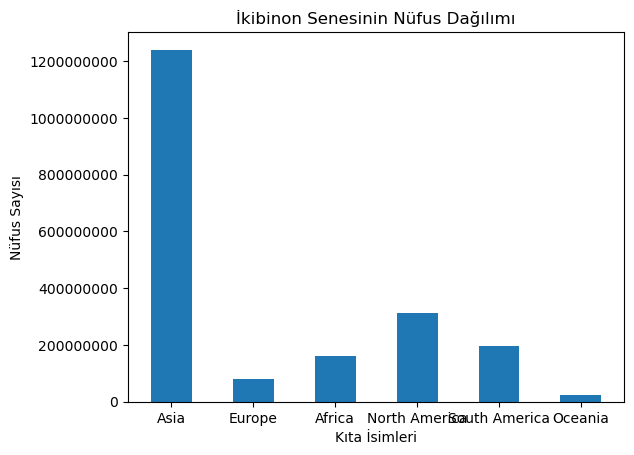

In [17]:
plt.bar(df_concat_son.Continent,df_concat_son.ikibinon_population, width=0.5)
plt.ylabel("Nüfus Sayısı")
plt.xlabel("Kıta İsimleri")
plt.title("İkibinon Senesinin Nüfus Dağılımı")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.show()

# Scatter düzeyinde ülkelerin ikibinon yılında büyüme oranı değerleriyle eşleştirildiği grafiği oluşturduk


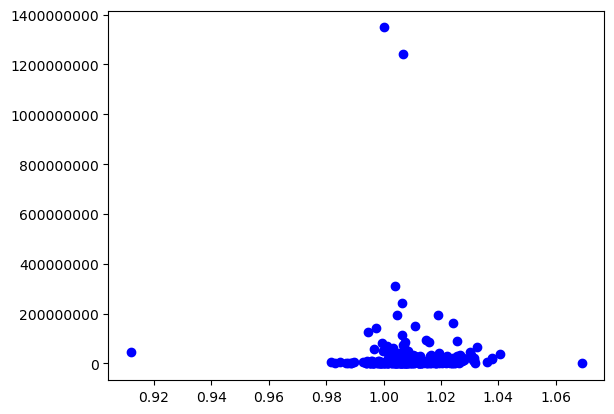

In [18]:
plt.scatter(df_concat.Growth_Rate, df_concat.ikibinon_population, color = "blue")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.show()


# Scatter düzeyinde ikibinon yılında ülkelerin popülasyonuna bağlı olarak ekonomilerinin ne kadar geliştiği grafiğini oluşturduk


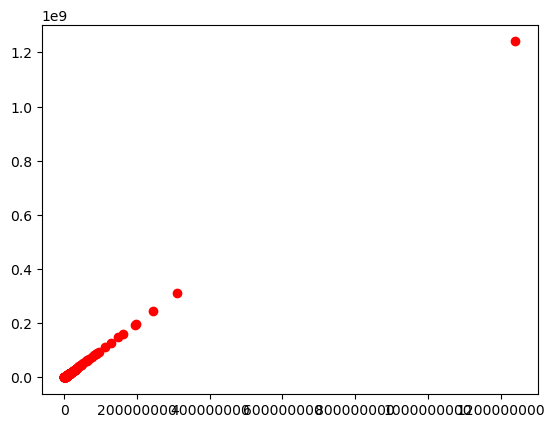

In [20]:
plt.scatter(df_concat_son.ikibinon_population, df_concat_son.ikibinon_population, color = "red")
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)

plt.show()

# Bar düzeyinde kıtalara göre area büyüklüğünün karşılaştırılması


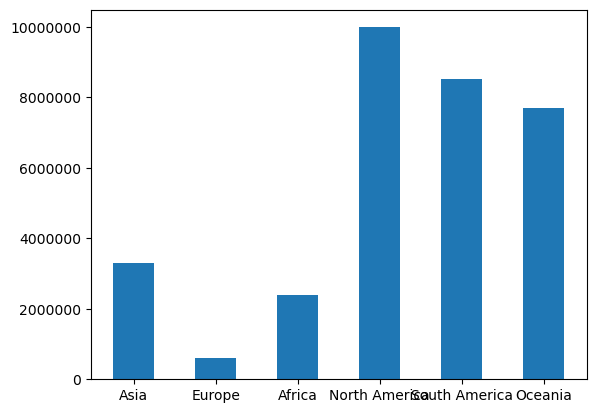

In [24]:
plt.bar(df_concat_son.Continent, df_concat_son.Area, width = 0.5)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.show()

# Binlere ayırma 


In [25]:
binler = np.array_split(df_concat_son, 17)

for i, binary in enumerate(binler):
    print(f"Bin {i+1}: {binary}")


Bin 1:         1980      1981      1982      1983       1984      1985       1986  \
0   2.913281  2.630303  0.939552  1.456716   4.179851  2.888806   3.627612   
1   2.700000  5.700000  2.900000  1.100000   2.000000 -1.500000   5.600000   
2  -5.400000  3.000000  6.400000  5.400000   5.600000  5.600000  -0.200000   
3   2.913281  2.630303  0.939552  1.456716   4.179851  2.888806   3.627612   
4   2.400000 -4.400000  0.000000  4.200000   6.000000  3.500000   2.900000   
5   8.200000  3.800000 -0.100000  5.400000  10.200000  7.600000  11.500000   
6   0.700000 -5.700000 -3.100000  3.700000   2.000000 -7.000000   7.100000   
7   2.913281  2.630303  0.939552  1.456716   4.179851  2.888806   3.627612   
8   2.913281  2.630303  0.939552  1.456716   4.179851  2.888806   3.627612   
9   2.900000  4.100000  0.100000 -0.500000   6.300000  5.500000   2.400000   
10  2.300000 -0.100000  1.900000  2.800000   0.300000  2.200000   2.300000   

         1987       1988       1989  ...  1970 Populatio

# Tanımladığımız binary ile turta şeklinde areaların karşılaştırılması 


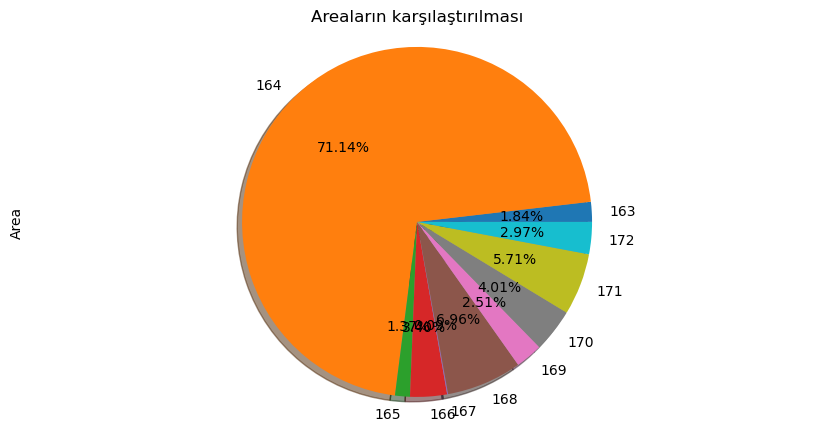

In [27]:
binary['Area'].plot(kind = 'pie', figsize = (10,5), shadow = True, autopct ='%1.2f%%')
plt.title('Areaların karşılaştırılması')
plt.axis('equal')

plt.show()

# 1970 ile 2022 yılları arasındaki nüfus değişimi


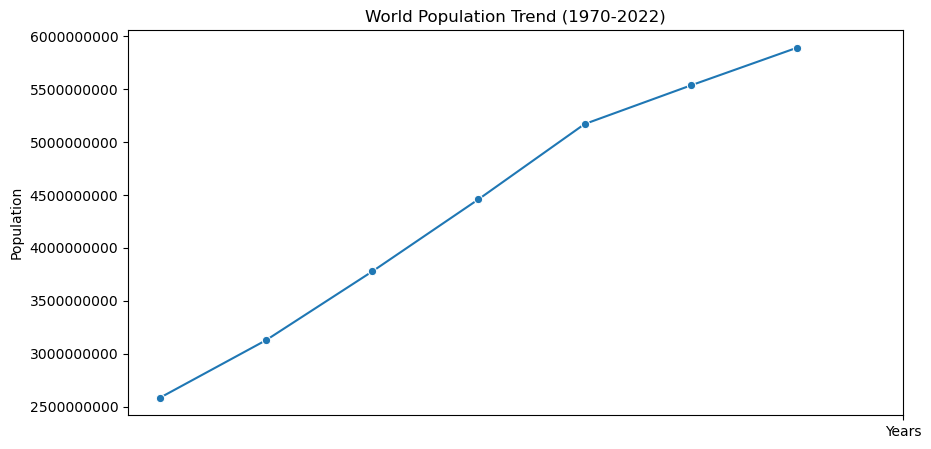

In [33]:
plt.subplots(figsize=(10,5))
trend = df_concat_son.iloc[:,47:54].sum().sort_values(ascending=True)
sns.lineplot(x=trend.index, y=trend.values, marker="o")
plt.xticks("Years")
plt.ylabel("Population")
plt.title("World Population Trend (1970-2022)")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.show()